<a href="https://colab.research.google.com/github/MikhailKuklin/exploratory_data_analysis_pandas/blob/main/2021_05_31_exploratory_data_analysis_pandas_partI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# load necessary library/modules

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [95]:
# open database file - cvs in that case

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [96]:
# basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92791 entries, 0 to 92790
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               92791 non-null  object 
 1   continent                              88392 non-null  object 
 2   location                               92791 non-null  object 
 3   date                                   92791 non-null  object 
 4   total_cases                            89951 non-null  float64
 5   new_cases                              89950 non-null  float64
 6   new_cases_smoothed                     88938 non-null  float64
 7   total_deaths                           80028 non-null  float64
 8   new_deaths                             80186 non-null  float64
 9   new_deaths_smoothed                    88938 non-null  float64
 10  total_cases_per_million                89470 non-null  float64
 11  ne

In [97]:
# get names of all columns

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [98]:
# rename column

df.rename(columns={"location": "country"}) #inplace=True if permanent

,iso_code,continent,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92786,ZWE,Africa,Zimbabwe,2021-05-28,38918.0,64.0,36.286,1592.0,0.0,0.857,2618.461,4.306,2.441,107.112,0.000,0.058,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1833.0,546389.0,36.762,0.123,1727.0,0.116,0.021,47.6,tests performed,976796.0,656630.0,320166.0,23407.0,12695.0,6.57,4.42,2.15,854.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92787,ZWE,Africa,Zimbabwe,2021-05-29,38933.0,15.0,36.286,1594.0,2.0,1.143,2619.471,1.009,2.441,107.247,0.135,0.077,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2032.0,548421.0,36.899,0.137,1790.0,0.120,0.020,49.3,tests performed,1002465.0,666786.0,335679.0,25669.0,14056.0,6.74,4.49,2.26,946.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92788,ZWE,Africa,Zimbabwe,2021-05-30,38944.0,11.0,37.429,1594.0,0.0,1.143,2620.211,0.740,2.518,107.247,0.000,0.077,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1011973.0,670755.0,341218.0,9508.0,14420.0,6.81,4.51,2.30,970.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92789,ZWE,Africa,Zimbabwe

In [99]:
# get a range of rows

df.index

RangeIndex(start=0, stop=92791, step=1)

In [100]:
# get number of columns and rows

df.shape

(92791, 59)

In [101]:
# check if database has duplicated

df.drop_duplicates().shape

(92791, 59)

In [102]:
# check table

#df.head(50)
df.tail(100)
#df.describe()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
92691,ZWE,Africa,Zimbabwe,2021-02-22,35862.0,66.0,91.429,1441.0,5.0,4.429,2412.849,4.441,6.151,96.953,0.336,0.298,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1643.0,370161.0,24.905,0.111,2264.0,0.152,0.040,24.8,tests performed,1314.0,1314.0,NaN,NaN,328.0,0.01,0.01,NaN,22.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92692,ZWE,Africa,Zimbabwe,2021-02-23,35910.0,48.0,85.000,1448.0,7.0,4.857,2416.079,3.230,5.719,97.424,0.471,0.327,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873.0,372034.0,25.031,0.126,2084.0,0.140,0.041,24.5,tests performed,4041.0,4041.0,NaN,2727.0,808.0,0.03,0.03,NaN,54.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92693,ZWE,Africa,Zimbabwe,2021-02-24,35960.0,50.0,76.714,1456.0,8.0,5.429,2419.443,3.364,5.161,97.962,0.538,0.365,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1804.0,373838.0,25.152,0.121,2047.0,0.138,0.037,26.7,tests performed,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92694,ZWE,Africa,Zimbabwe,2021-02-25,35994.0,34.0,64.429,1458.0,2.0,5.429,2421.730,2.288,4.335,98.096,0.135,0.365,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2965.0,376803.0,25.352,0.199,1903.0,0.128,0.034,29.5,tests performed,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92695,ZWE,Africa,Zimbabwe,2021-02-26,36044.0,50.0,47.714,1463.0,5.0,4.714,2425.094,3.364,3.210,98.433,0.336,0.317,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2141.0,378944.0,25.496,0.144,1868.0,0.126,0.026,39.1,tests performed,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92786,ZWE,Africa,Zimbabwe,2021-05-28,38918.0,64.0,36.286,1592.0,0.0,0.857,2618.461,4.306,2.441,107.112,0.000,0.058,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1833.0,546389.0,36.762,0.123,1727.0,0.116,0.021,47.6,tests performed,976796.0,656630.0,320166.0,23407.0,12695.0,6.57,4.42,2.15,854.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92787,ZWE,Africa,Zimbabwe,2021-05-29,38933.0,15.0,36.286,1594.0,2.0,1.143,2619.471,1.009,2.441,107.247,0.135,0.077,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2032.0,548421.0,36.899,0.137,1790.0,0.120,0.020,49.3,tests performed,1002465.0,666786.0,335679.0,25669.0,14056.0,6.74,4.49,2.26,946.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,3

In [103]:
# load only one column

df_ocol = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')['new_vaccinations']
print(f"Number of days when vaccine has been given: {np.sum(df_ocol > 0)}")

Number of days when vaccine has been given: 10637


In [104]:
# average

df.mean()

total_cases                              9.468393e+05
new_cases                                6.067839e+03
new_cases_smoothed                       6.081018e+03
total_deaths                             2.544561e+04
new_deaths                               1.424395e+02
new_deaths_smoothed                      1.272808e+02
total_cases_per_million                  1.162189e+04
new_cases_per_million                    7.609499e+01
new_cases_smoothed_per_million           7.632639e+01
total_deaths_per_million                 2.530185e+02
new_deaths_per_million                   1.517191e+00
new_deaths_smoothed_per_million          1.356795e+00
reproduction_rate                        1.008449e+00
icu_patients                             1.097752e+03
icu_patients_per_million                 2.712436e+01
hosp_patients                            4.820551e+03
hosp_patients_per_million                1.755012e+02
weekly_icu_admissions                    2.910496e+02
weekly_icu_admissions_per_mi

In [105]:
# extract average of two columns

df[['new_deaths','new_cases']].mean()

new_deaths     142.439528
new_cases     6067.839211
dtype: float64

In [106]:
# extract average of same columns for Asia only

df[df.continent=='Asia'][['new_deaths','new_cases']].mean()

new_deaths      36.675190
new_cases     2356.274479
dtype: float64

In [107]:
# extract average of same columns for Europe and Asia

df[df.continent.isin(['Europe','Asia'])][['new_deaths','new_cases']].mean()

new_deaths      45.599013
new_cases     2281.186931
dtype: float64

In [108]:
# select data only for 2020-05-05

df[df.date.isin(["2020-05-05"])]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
71,AFG,Asia,Afghanistan,2020-05-05,3225.0,330.0,199.286,95.0,5.0,5.143,82.845,8.477,5.119,2.440,0.128,0.132,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
546,OWID_AFR,NaN,Africa,2020-05-05,48997.0,2038.0,2029.000,1908.0,66.0,55.000,36.549,1.520,1.514,1.423,0.049,0.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,ALB,Europe,Albania,2020-05-05,820.0,17.0,10.000,31.0,0.0,0.143,284.940,5.907,3.475,10.772,0.000,0.050,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,9157.0,3.182,0.094,217.0,0.075,0.046,21.7,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.81,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
1472,DZA,Africa,Algeria,2020-05-05,4838.0,190.0,169.857,470.0,5.0,4.714,110.328,4.333,3.874,10.718,0.114,0.108,1.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.85,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
1929,AND,Europe,Andorra,2020-05-05,751.0,1.0,1.143,46.0,1.0,0.714,9719.796,12.942,14.791,595.354,12.942,9.245,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.78,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90539,VNM,Asia,Vietnam,2020-05-05,271.0,0.0,0.143,NaN,NaN,0.000,2.784,0.000,0.001,NaN,NaN,0.000,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.15,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
91100,OWID_WRL,NaN,World,2020-05-05,3681990.0,80502.0,80392.143,261614.0,5823.0,5251.429,472.365,10.328,10.314,33.563,0.747,0.674,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
91518,YEM,Asia,Yemen,2020-05-05,21.0,9.0,2.857,3.0,1.0,0.429,0.704,0.302,0.096,0.101,0.034,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.48,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
91959,ZMB,Africa

In [109]:
# slicing

df[df.continent=='Asia'][['new_deaths','new_cases']][20000:20010]

,new_deaths,new_cases
85654,20.0,1313.0
85655,26.0,1491.0
85656,36.0,1517.0
85657,39.0,1549.0
85658,42.0,1482.0
85659,44.0,1587.0
85660,47.0,1572.0
85661,45.0,1596.0
85662,49.0,1642.0
85663,53.0,1612.0


In [110]:
# add a new column

df.loc[df.new_vaccinations > 0, 'vaccines_given'] = 'yes'
df.loc[df.new_vaccinations <= 0, 'vaccines_given'] = 'no'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,vaccines_given
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [111]:
# count values in a new column

df[df.location=='Finland'].vaccines_given.value_counts()

yes    96
Name: vaccines_given, dtype: int64

In [112]:
# unique

df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [113]:
# drop nans

df['continent'].dropna().unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [114]:
# sort values

df[['continent','location','new_cases_per_million']].sort_values('new_cases_per_million') # ascending=False

,continent,location,new_cases_per_million
30566,Europe,France,-5160.525
49758,Europe,Luxembourg,-2153.437
78936,Europe,Spain,-1590.147
30369,Europe,France,-681.958
28903,NaN,European Union,-679.948
...,...,...,...
90991,Oceania,Wallis and Futuna,NaN
90992,Oceania,Wallis and Futuna,NaN
90993,Oceania,Wallis and Futuna,NaN
90994,Oceania,Wallis and Futuna,NaN


In [115]:
# create dataframe only for Europe

df_europe=df[df.continent=='Europe']

In [116]:
# show total cases in France

df_europe[df_europe.location=='France']['total_cases'].max()

5978650.0

In [117]:
# shorter command

df[(df.continent=='Europe') & (df.location=='France')]['total_cases'].max()

5978650.0

In [118]:
# sum of new cases in Europe

df_europe[df_europe.continent=='Europe']['new_cases'].sum()

46935307.0

In [119]:
# number of cases in european countries

countries=df_europe.location.unique()

for country in countries:
  print(f"{country}:{df_europe[df_europe.location==country]['total_cases'].max()}")

Albania:132337.0
Andorra:13729.0
Austria:645152.0
Belarus:395075.0
Belgium:1063499.0
Bosnia and Herzegovina:204093.0
Bulgaria:418813.0
Croatia:356397.0
Cyprus:72515.0
Czechia:1661780.0
Denmark:282896.0
Estonia:129674.0
Faeroe Islands:nan
Finland:92642.0
France:5978650.0
Germany:3692908.0
Gibraltar:nan
Greece:404163.0
Guernsey:nan
Hungary:804712.0
Iceland:6555.0
Ireland:261535.0
Isle of Man:nan
Italy:4220304.0
Jersey:nan
Kosovo:107021.0
Latvia:133518.0
Liechtenstein:3012.0
Lithuania:274776.0
Luxembourg:69983.0
Malta:30543.0
Moldova:255241.0
Monaco:2506.0
Montenegro:99652.0
Netherlands:1679093.0
North Macedonia:155304.0
Norway:125576.0
Poland:2872868.0
Portugal:849538.0
Romania:1077978.0
Russia:5022881.0
San Marino:5090.0
Serbia:712702.0
Slovakia:389866.0
Slovenia:254045.0
Spain:3682778.0
Sweden:1068473.0
Switzerland:695496.0
Ukraine:2263167.0
United Kingdom:4506333.0
Vatican:27.0


In [120]:
# extract number of vaccinated people per hundred in each continent

mlist1=df['continent']
mlist1.dropna(inplace=True)
mlist2=mlist1.unique()

for cont in mlist2:
  tmp=df[df.continent==cont]
  print(f"People vaccinated per hundred in {cont} is {tmp['people_vaccinated_per_hundred'].max():.0f}")

People vaccinated per hundred in Asia is 63
People vaccinated per hundred in Europe is 116
People vaccinated per hundred in Africa is 72
People vaccinated per hundred in North America is 66
People vaccinated per hundred in South America is 76
People vaccinated per hundred in Oceania is 100


In [121]:
# extract number of vaccinated people per hundred in european countries

mlist3=df[df.continent=='Europe']
mlist4=mlist3['location']
mlist4.dropna(inplace=True)
mlist5=mlist4.unique()

for country in mlist5:
  tmp=df[df.location==country]
  print(f"People vaccinated per hundred in {country} is {tmp['people_vaccinated_per_hundred'].max():.0f}")

People vaccinated per hundred in Albania is 17
People vaccinated per hundred in Andorra is 36
People vaccinated per hundred in Austria is 40
People vaccinated per hundred in Belarus is 5
People vaccinated per hundred in Belgium is 40
People vaccinated per hundred in Bosnia and Herzegovina is 6
People vaccinated per hundred in Bulgaria is 12
People vaccinated per hundred in Croatia is 31
People vaccinated per hundred in Cyprus is 44
People vaccinated per hundred in Czechia is 36
People vaccinated per hundred in Denmark is 37
People vaccinated per hundred in Estonia is 36
People vaccinated per hundred in Faeroe Islands is 42
People vaccinated per hundred in Finland is 44
People vaccinated per hundred in France is 38
People vaccinated per hundred in Germany is 43
People vaccinated per hundred in Gibraltar is 116
People vaccinated per hundred in Greece is 35
People vaccinated per hundred in Guernsey is 49
People vaccinated per hundred in Hungary is 54
People vaccinated per hundred in Icela

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


People vaccinated per hundred in Kosovo is 3
People vaccinated per hundred in Latvia is 26
People vaccinated per hundred in Liechtenstein is 32
People vaccinated per hundred in Lithuania is 37
People vaccinated per hundred in Luxembourg is 36
People vaccinated per hundred in Malta is 72
People vaccinated per hundred in Moldova is 8
People vaccinated per hundred in Monaco is 42
People vaccinated per hundred in Montenegro is 21
People vaccinated per hundred in Netherlands is 37
People vaccinated per hundred in North Macedonia is 11
People vaccinated per hundred in Norway is 30
People vaccinated per hundred in Poland is 36
People vaccinated per hundred in Portugal is 38
People vaccinated per hundred in Romania is 22
People vaccinated per hundred in Russia is 11
People vaccinated per hundred in San Marino is 64
People vaccinated per hundred in Serbia is 37
People vaccinated per hundred in Slovakia is 32
People vaccinated per hundred in Slovenia is 32
People vaccinated per hundred in Spain 

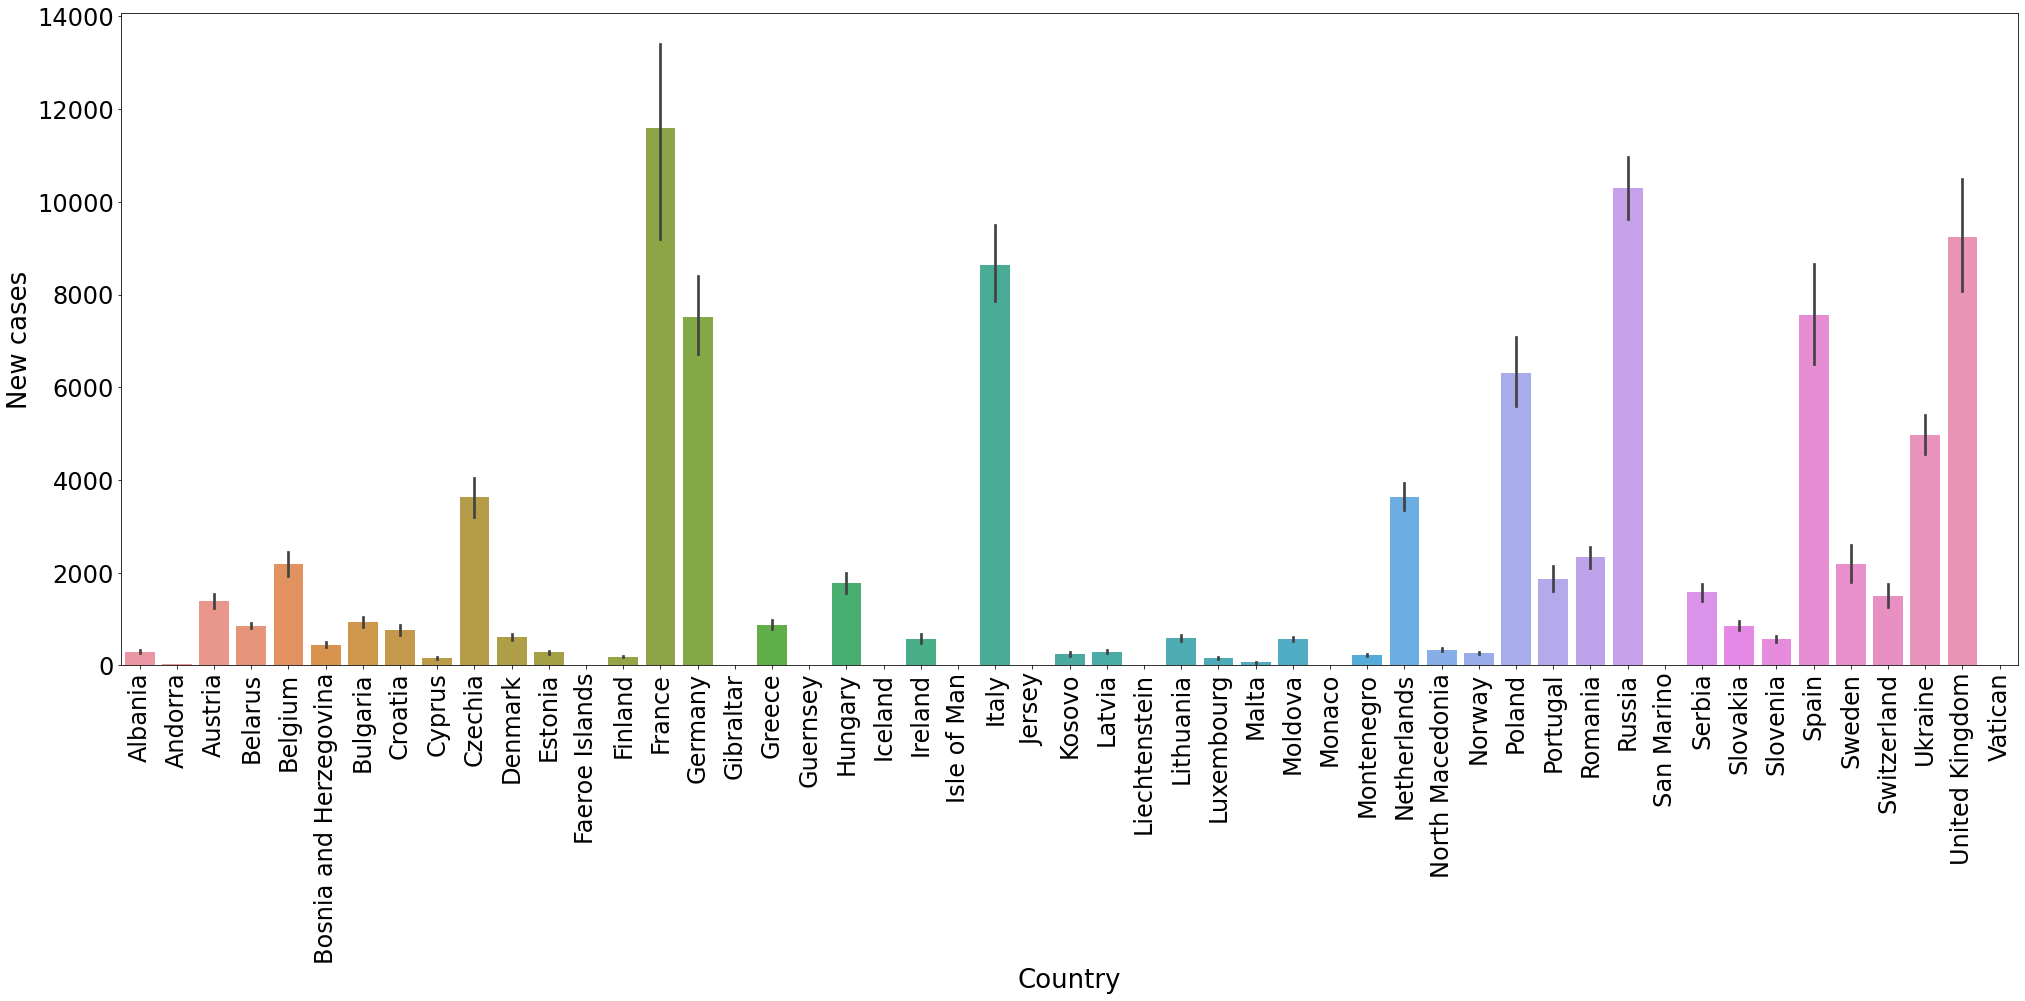

In [122]:
# bar plot EU countries vs. new cases

plt.figure(figsize=(34,12))
sns.barplot(x='location',y='new_cases', data=df_europe)
plt.xlabel('Country', fontsize=26)
plt.xticks(fontsize=24,rotation='90')
plt.ylabel('New cases', fontsize=26)
plt.yticks(fontsize=24)
plt.show()

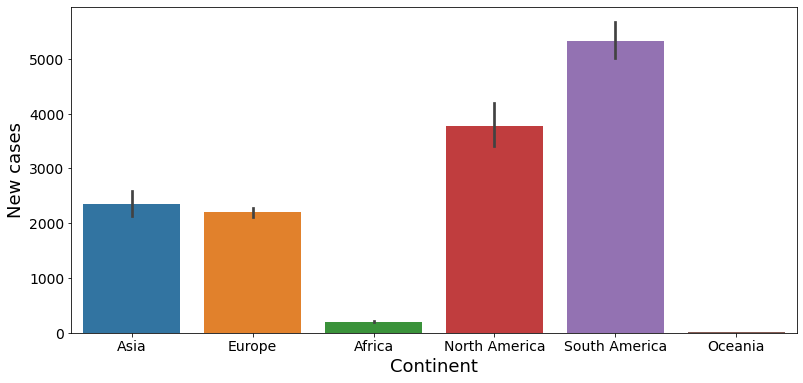

In [123]:
# bar plot continent vs. new cases

plt.figure(figsize=(13,6))
sns.barplot(x='continent',y='new_cases', data=df)
plt.xlabel('Continent', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('New cases', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

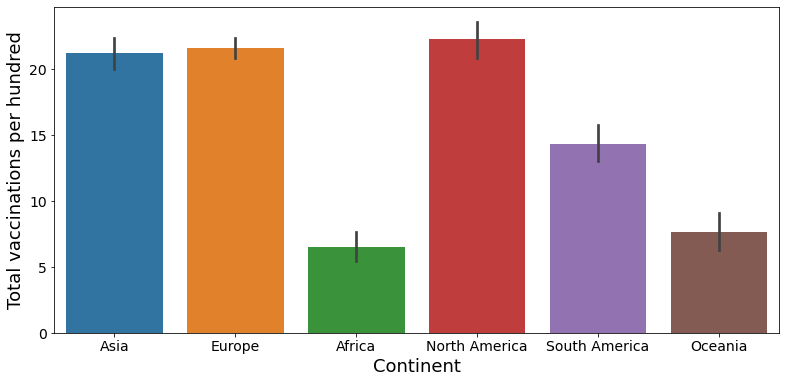

In [124]:
# bar plot continent vs. total vaccinations per hundred

plt.figure(figsize=(13,6))
sns.barplot(x='continent',y='total_vaccinations_per_hundred', data=df)
plt.xlabel('Continent', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Total vaccinations per hundred', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [125]:
# correlations

correlat=df.corr()
correlat
#correlat>0.9

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.861587,0.888324,0.986899,0.849534,0.875315,0.130186,0.050483,0.066386,0.155105,0.057904,0.082738,-0.003170,0.747405,0.171607,0.695015,0.069929,0.599087,0.179355,0.702382,0.054360,0.801916,0.960484,0.107111,0.043352,0.827810,0.049966,0.016301,-0.033942,0.775873,0.839978,0.805152,0.757412,0.784028,-0.011054,-0.029723,-0.036777,0.008597,0.073452,0.619676,-0.015877,0.031748,0.029166,0.026090,0.017315,-0.034184,-0.035572,0.019906,-0.000672,-0.009278,0.030787,-0.006918,0.020724,0.036231
new_cases,0.861587,1.000000,0.980364,0.862500,0.920399,0.915884,0.080339,0.099878,0.095816,0.100186,0.076856,0.095564,0.015037,0.910892,0.267238,0.885637,0.157420,0.610932,0.177223,0.906769,0.128827,0.760240,0.651664,0.036086,0.028334,0.759106,0.029940,0.088489,-0.033280,0.637537,0.675197,0.634593,0.655977,0.670863,-0.074092,-0.094533,-0.101097,-0.028110,0.092056,0.687541,-0.017129,0.033161,0.029724,0.026280,0.013789,-0.035150,-0.037246,0.022285,-0.004284,-0.010996,0.035144,-0.009157,0.020878,0.036424
new_cases_smoothed,0.888324,0.980364,1.000000,0.887471,0.922436,0.940535,0.084942,0.077039,0.098267,0.106035,0.073826,0.100363,0.011108,0.953641,0.281311,0.924533,0.165433,0.730374,0.254652,0.938093,0.137381,0.791810,0.684916,0.039523,0.029240,0.802434,0.032748,0.090672,-0.034767,0.668538,0.705139,0.661942,0.676407,0.696653,-0.070725,-0.091529,-0.098801,-0.025480,0.096183,0.700379,-0.017458,0.034098,0.030797,0.027296,0.014350,-0.035646,-0.037997,0.022385,-0.003868,-0.011319,0.035580,-0.009002,0.021410,0.037300
total_deaths,0.986899,0.862500,0.887471,1.000000,0.873026,0.899261,0.119747,0.043932,0.057753,0.172907,0.065891,0.086717,-0.003365,0.767282,0.162877,0.731133,0.079749,0.560873,0.075516,0.711297,0.037693,0.765308,0.887250,0.090813,0.035088,0.785970,0.039522,0.056345,-0.042747,0.739075,0.812860,0.783424,0.720575,0.748149,-0.017380,-0.032249,-0.042492,0.007120,0.076744,0.641787,-0.019699,0.034603,0.031591,0.029103,0.013738,-0.041645,-0.042992,0.026142,-0.002134,-0.008837,0.039684,-0.009606,0.024779,0.040192
new_deaths,0.849534,0.920399,0.922436,0.873026,1.000000,0.974432,0.075689,0.065864,0.076902,0.121309,0.126978,0.130311,0.005527,0.896973,0.322827,0.904902,0.235607,0.631699,0.281252,0.885692,0.184730,0.728752,0.616508,0.019065,0.016975,0.702395,0.013158,0.168575,-0.045515,0.587543,0.630487,0.593462,0.614681,0.626027,-0.082307,-0.100188,-0.107560,-0.030181,0.121346,0.706602,-0.021600,0.035969,0.031172,0.028135,0.008297,-0.043861,-0.041598,0.029210,-0.005597,-0.007575,0.044648,-0.008691,0.023639,0.039900
new_deaths_smoothed,0.875315,0.915884,0.940535,0.899261,0.974432,1.000000,0.087765,0.064290,0.084385,0.127227,0.103982,0.141690,0.004205,0.940953,0.334996,0.945346,0.244844,0.675523,0.219732,0.896041,0.149584,0.733277,0.649586,0.026435,0.016446,0.739471,0.017748,0.174489,-0.046367,0.607910,0.651505,0.616318,0.622525,0.644935,-0.0

In [126]:
# correlation between two columns

col1=df['new_cases_per_million']
col2=df['total_vaccinations_per_hundred']
col1.corr(col2)

0.14605583472199873

In [127]:
# show country with the lowest number of male smokers in the world

country_ml_min=df['location'].loc[df['male_smokers'].idxmin()]
print(f"{country_ml_min} has the lowest number of males smokers:{df['male_smokers'].min()}%")

Ghana has the lowest number of males smokers:7.7%


In [128]:
# show country with the highest number of male smokers in the world

country_ml_max=df['location'].loc[df['male_smokers'].idxmax()]
print(f"{country_ml_max} has the highest number of males smokers:{df['male_smokers'].max()}%")

Timor has the highest number of males smokers:78.1%


In [129]:
# show country with the highest number of female smokers in the world

country_fl_max=df['location'].loc[df['female_smokers'].idxmax()]
print(f"{country_fl_max} has the highest number of females smokers:{df['female_smokers'].max()}%")

Montenegro has the highest number of females smokers:44.0%


In [130]:
# show country with the lowest number of female smokers in the world

country_fl_min=df['location'].loc[df['female_smokers'].idxmin()]
print(f"{country_fl_min} has the lowest number of females smokers:{df['female_smokers'].min()}%")

Niger has the lowest number of females smokers:0.1%


In [131]:
# show country with the highest number of vaccinated people per hundred in the world

country_pvh_max=df['location'].loc[df['people_vaccinated_per_hundred'].idxmax()]
print(f"{country_pvh_max} has the highest number of vaccinated people:{df[df.location==country_pvh_max]['people_vaccinated_per_hundred'].mean():.0f}%")

Gibraltar has the highest number of vaccinated people:70%
